In [3]:
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot
import numpy as np
import matplotlib.pyplot as plt
import time as clock
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib notebook



In [5]:
def jacobi(A,b,N=25,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))

    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = diag(A)
    R = A - diagflat(D)

    # Iterate for N times                                                                                                                                                                          
    for i in range(N):
        x = (b - dot(R,x)) / D
    return x

A = array([[2.0,1.0],[5.0,7.0]])
b = array([11.0,13.0])
guess = array([1.0,1.0])

sol = jacobi(A,b,N=25,x=guess)

print ("A:")
pprint(A)

print ("b:")
pprint(b)

print ("x:")
pprint(sol)

A:
array([[2., 1.],
       [5., 7.]])
b:
array([11., 13.])
x:
array([ 7.11110202, -3.22220342])


In [7]:
# проверить разные схемы
# проверить разные омега оно лежит от 1 до 2 и там уже попробовать построить решения

<IPython.core.display.Javascript object>


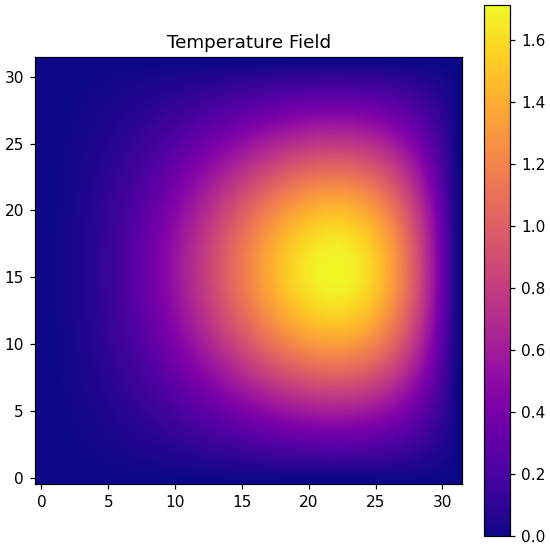

In [4]:
# init

N = 32
u = np.zeros((N, N))
u_1 = np.copy(u)
x_1 = np.linspace(0,np.pi, N)
y_1 = np.copy(x_1)
f = np.copy(u)
func_init = np.zeros((N,N))
func_exact = np.zeros((N,N))


def func(x, y):
    return np.exp(np.sin(x))*(np.cos(x)**2 - np.sin(x))* np.sin(y**2/np.pi) + (np.exp(np.sin(x)) - 1)*((2/np.pi)*np.cos(y**2/np.pi) - 4*y**2/np.pi**2*np.sin(y**2/np.pi))

def func_e(x, y):
    return (np.exp(np.sin(x)) - 1) * np.sin(y**2/np.pi)

def init(Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            
            func_init[i][j] = func(y_1[i], x_1[j])
    return func_init

def exact(Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            
            func_exact[i][j] = func_e(y_1[i], x_1[j])
            
    return func_exact

L= exact(N)
# L=init(N)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
       
p2 = ax.imshow(L, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

fig.colorbar(p2)
ax.set_title('Temperature Field')

fig.canvas.draw()



In [374]:

global dif_arr_J
dif_arr_J = []

def Jacoby(Nd):
    
    err_arr = []
    num_arr = []
    k = -1
    e = exact(Nd)
    f = init(Nd)

    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
    u_1 = np.zeros((Nd,Nd))
    while k==-1 or min(err_arr)>1e-6 and k != 8000:
        
        k += 1 
        u_new = np.copy(u)
        
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u[i][j] = (u[i-1][j] + u[i+1][j] + u[i][j-1] + u[i][j+1] - h**2 * f[i][j]) / 4
                
        err_arr.append(np.max(abs(u_new - u)))
        num_arr.append(k+1)
    dif_arr_J.append(np.max(abs(e - u)))
    print(k)
    return u, err_arr, dif_arr_J, num_arr
    
for Nd in [8, 16, 32, 64]:
    x_1 = np.linspace(0,np.pi, Nd)
    y_1 = np.copy(x_1)
    f = np.copy(u)
    func_init = np.zeros((Nd,Nd))
    func_exact = np.zeros((Nd,Nd))
    Jacoby(Nd)


# fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

# p2 = ax.imshow(U, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p2)

# fig.canvas.draw()

# plt.subplots(1)
# plt.plot(Error)

61
249
922
3231


<IPython.core.display.Javascript object>


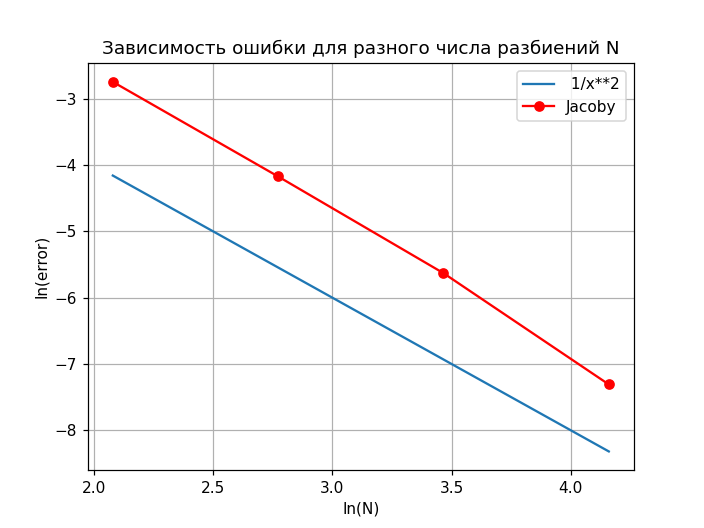

[]

In [377]:
number = np.array([8, 16, 32, 64])


plt.subplots(1)
plt.title('Зависимость ошибки для разного числа разбиений N')
plt.xlabel('ln(N)')
plt.ylabel('ln(error)')
plt.plot(np.log(number), np.log(1/number**2), label = ' 1/x**2')

plt.plot(np.log(number), np.log(dif_arr_J), '-ro', label = 'Jacoby')
plt.grid()
plt.legend()
plt.plot()

61
249
922
3231


<IPython.core.display.Javascript object>


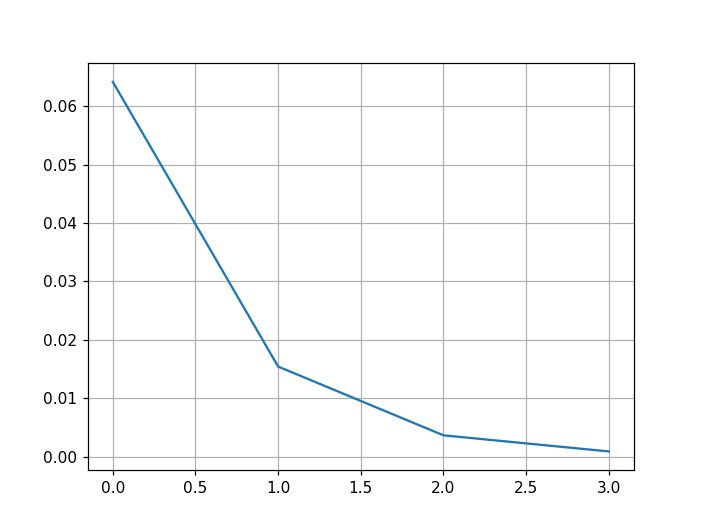

In [375]:

global dif_arr_G
dif_arr_G = []

def gauss(Nd) :  
    err_arr = []
    num_arr = []
    k = -1
    e = exact(Nd)
    f = init(Nd)

    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
    u_1 = np.zeros((Nd,Nd))
    while k==-1 or min(err_arr)>1e-6 and k != 8000:
        
        k += 1 
        u_new = np.copy(u_1)
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u_1[i][j] = -(f[i][j]*h**2 - u_1[i-1][j] - u[i+1][j] - u_1[i][j-1]- u[i][j+1])/4
                u = np.copy(u_1)
        
        err_arr.append(np.max(abs(u_new - u)))
        num_arr.append(k+1)
    dif_arr_G.append(np.max(abs(e - u)))
    print(k)
    return u_1, err_arr, dif_arr_G, num_arr

# U, arr, Error, num_arr = gauss(N)

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

# p2 = ax.imshow(Differ, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p2)

# fig.canvas.draw()

for Nd in [8, 16, 32, 64]:
    x_1 = np.linspace(0,np.pi, Nd)
    y_1 = np.copy(x_1)
    f = np.copy(u)
    func_init = np.zeros((Nd,Nd))
    func_exact = np.zeros((Nd,Nd))
    gauss(Nd)
    




plt.subplots(1)
plt.plot(dif_arr)
plt.grid()
# plt.plot(np.log(number), np.log(1/number))
# plt.plot(np.log(number), np.log(array))
# plt.plot(Error)
# plt.plot(arr)

<IPython.core.display.Javascript object>


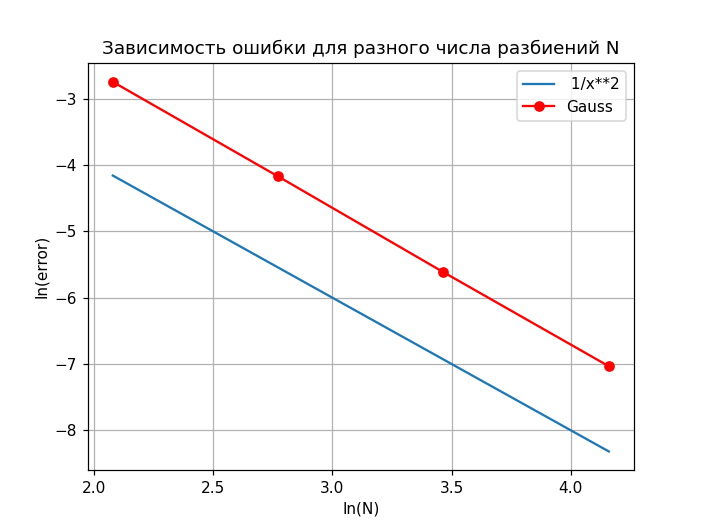

[]

In [350]:

number = np.array([8, 16, 32, 64])


plt.subplots(1)
plt.title('Зависимость ошибки для разного числа разбиений N')
plt.xlabel('ln(N)')
plt.ylabel('ln(error)')
plt.plot(np.log(number), np.log(1/number**2), label = ' 1/x**2')

plt.plot(np.log(number), np.log(dif_arr_G), '-ro', label = 'Gauss')
plt.grid()
plt.legend()
plt.plot()

95
96
156
739


<IPython.core.display.Javascript object>


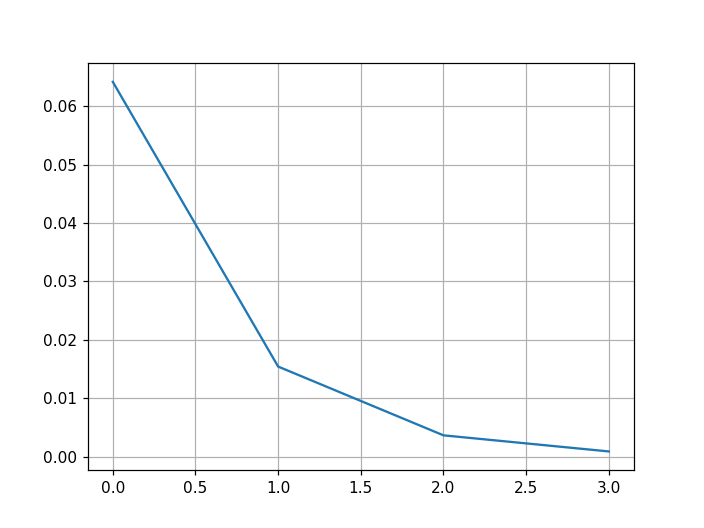

In [361]:

global dif_arr_R
dif_arr_R = []

def relax(Nd) :  
    err_arr = []
    num_arr = []
    k = -1
    e = exact(Nd)
    f = init(Nd)

    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
    u_1 = np.zeros((Nd,Nd))
    b = 1
    w = 1.8
    
    u_1 = np.zeros((Nd,Nd))
    while k == -1 or min(err_arr)>1e-9   and k != 8000 :
        k += 1 
        u_new = np.copy(u_1)
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                
                u_2 = (u_1[i-1][j] + u_1[i+1][j] + b**2*(u_1[i][j-1] + u_1[i][j+1])- f[i][j]*h**2)/(2*(1+b**2))  
                u_1[i][j] = w*u_2 + (1 - w)*u_1[i][j]
                
        err_arr.append(np.max(abs(u_new - u_1)))
        num_arr.append(k+1)
    dif_arr_R.append(np.max(abs(e - u_1)))
    print(k)
    return u_1, err_arr, dif_arr, num_arr
               
for Nd in [8, 16, 32, 64]:
    x_1 = np.linspace(0,np.pi, Nd)
    y_1 = np.copy(x_1)
    f = np.copy(u)
    func_init = np.zeros((Nd,Nd))
    func_exact = np.zeros((Nd,Nd))
    relax(Nd)
    




plt.subplots(1)
plt.plot(dif_arr_R)
plt.grid()      
        

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

# p1 = ax.imshow(U, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p1)

# fig.canvas.draw()



<IPython.core.display.Javascript object>


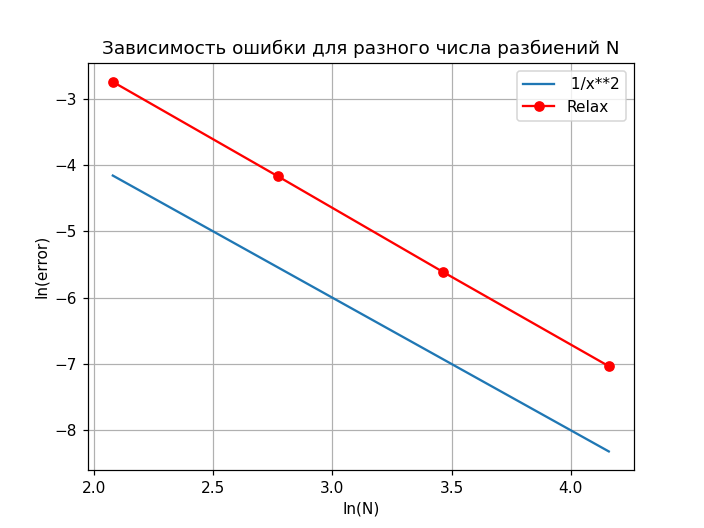

[]

In [362]:

number = np.array([8, 16, 32, 64])


plt.subplots(1)
plt.title('Зависимость ошибки для разного числа разбиений N')
plt.xlabel('ln(N)')
plt.ylabel('ln(error)')
plt.plot(np.log(number), np.log(1/number**2), label = ' 1/x**2')

plt.plot(np.log(number), np.log(dif_arr_R), '-ro', label = 'Relax')
plt.grid()
plt.legend()
plt.plot()

757
578
389
236
94
223


<IPython.core.display.Javascript object>


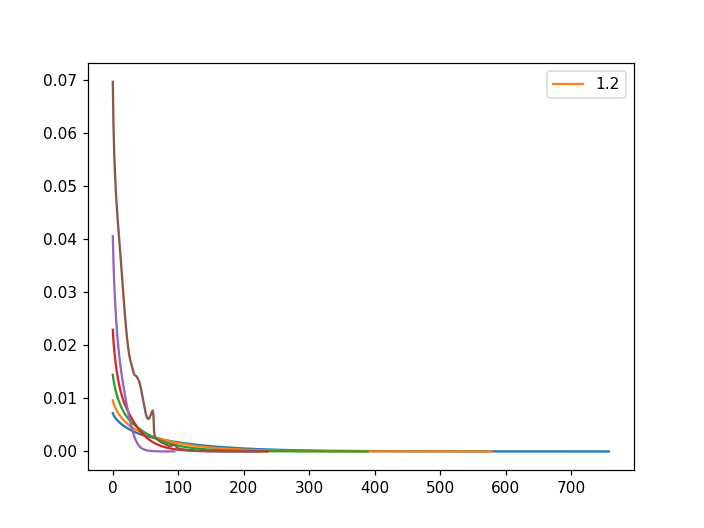

In [223]:
U0, Error0 = relax(N, 500, 1.05) 
U, Error = relax(N, 500, 1.2) 
U1, Error1 = relax(N, 500, 1.4) 
U2, Error2 = relax(N, 500, 1.6)
U3, Error3 = relax(N, 500, 1.8)
U4, Error4 = relax(N, 500, 1.95)

plt.subplots(1)

plt.plot(Error0)
plt.plot(Error, label = '1.2')
plt.plot(Error1)
plt.plot(Error2)
plt.plot(Error3)
plt.plot(Error4)
plt.legend()

<IPython.core.display.Javascript object>


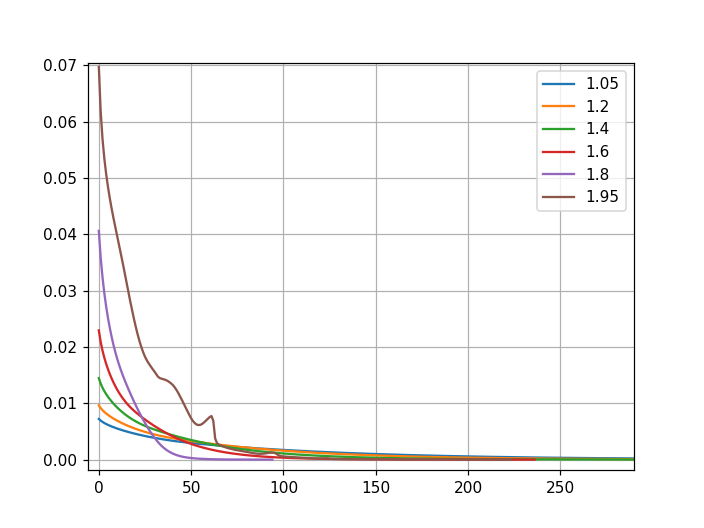

In [224]:
plt.subplots(1)
plt.grid()
plt.plot(Error0, label = '1.05')
plt.plot(Error, label = '1.2')
plt.plot(Error1, label = '1.4')
plt.plot(Error2, label = '1.6')
plt.plot(Error3, label = '1.8')
plt.plot(Error4, label = '1.95')
plt.legend()

1512


<IPython.core.display.Javascript object>


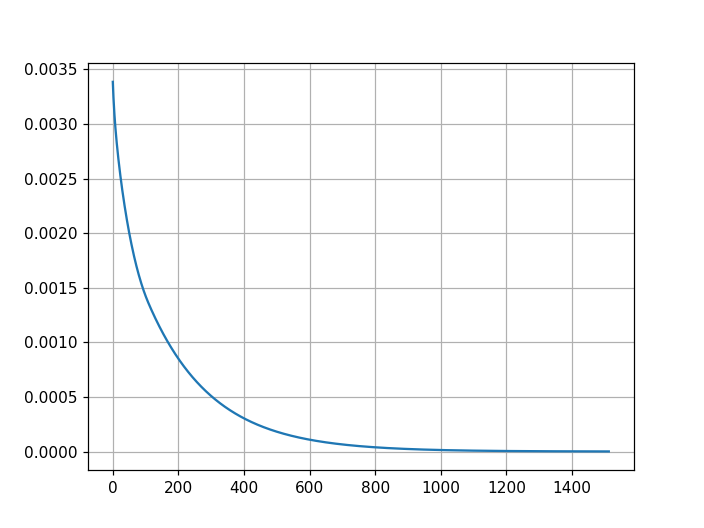

In [197]:
import numpy as np
n = 32


def jacobi_iteration(u, f, h):
    e = exact(n)
    k = -1
   
    h = abs(x_1[1] - x_1[2])
    u = np.zeros((n,n))
    while min(err_arr)>1e-6 and k != 1512:
        
#     for _ in range(iterations):
        k += 1
        u_new = u.copy()
        for i in range(1, u.shape[0] - 1):
            for j in range(1, u.shape[1] - 1):
                u_new[i, j] = (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1] - h**2 * f[i, j]) / 4
        err_arr[k] = np.mean(abs(u - u_new))
        u = u_new
        
    print(k)
    return u, err_arr

# Размер сетки и количество итераций
n, m, iterations = 32, 32, 1900

# Шаг сетки
h = 1 / (n - 1)

# Инициализация массивов u и f
u = np.zeros((n, m))
f = init(n)  # Можно заменить на другую функцию f(x, y)

# Решение уравнения Пуассона
u, Err = jacobi_iteration(u, f, h, 1512)
Y = np.zeros(iterations)
I = range(1, iterations+1)
for i in range (1, iterations):
    
    Y[i] = (1/i**0.5)

plt.subplots(1)
plt.plot((Err))
plt.grid()



for Nd in [8, 16, 32, 64]:
    x_1 = np.linspace(0,np.pi, Nd)
    y_1 = np.copy(x_1)
    f = np.copy(u)
    func_init = np.zeros((Nd,Nd))
    func_exact = np.zeros((Nd,Nd))
    jacobi_iteration(u, f, h, iterations)
    
# plt.plot(np.log(I), np.log(Y))

In [376]:

global dif_arr
dif_arr = []

def nine_p(Nd) :  
    err_arr = []
    num_arr = []
    k = -1
    e = exact(Nd)
    f = init(Nd)

    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
   
    while k==-1 or min(err_arr)>1e-9 and k != 8000:
        
        k += 1 
        u_new = np.copy(u)
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u[i][j] = (h**2/2*(f[i-1][j] + f[i+1][j] + f[i][j-1] + f[i][j+1] + 8* f[i][j])  - u[i-1][j-1] - u[i+1][j-1] - u[i-1][j+1] - u[i+1][j+1] - 4*(u[i-1][j] + u[i+1][j] + u[i][j-1] + u[i][j+1]))/(-20)
                
                
        
        err_arr.append(np.max(abs(u_new - u)))
        num_arr.append(k+1)
    dif_arr.append(np.max(abs(e - u)))
    print(k)
    return u, err_arr, dif_arr, num_arr

# U, arr, Error, num_arr = gauss(N)



for Nd in [8, 16, 32, 64]:
    x_1 = np.linspace(0,np.pi, Nd)
    y_1 = np.copy(x_1)
    f = np.copy(u)
    func_init = np.zeros((Nd,Nd))
    func_exact = np.zeros((Nd,Nd))
    nine_p(Nd)

    
    

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

# p2 = ax.imshow(U, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

# fig.colorbar(p2)

# fig.canvas.draw()



# plt.subplots(1)
# plt.plot(dif_arr)
# plt.grid()
# plt.plot(np.log(number), np.log(1/number))
# plt.plot(np.log(number), np.log(array))
# plt.plot(Error)
# plt.plot(arr)

80
342
1343
5067


<IPython.core.display.Javascript object>


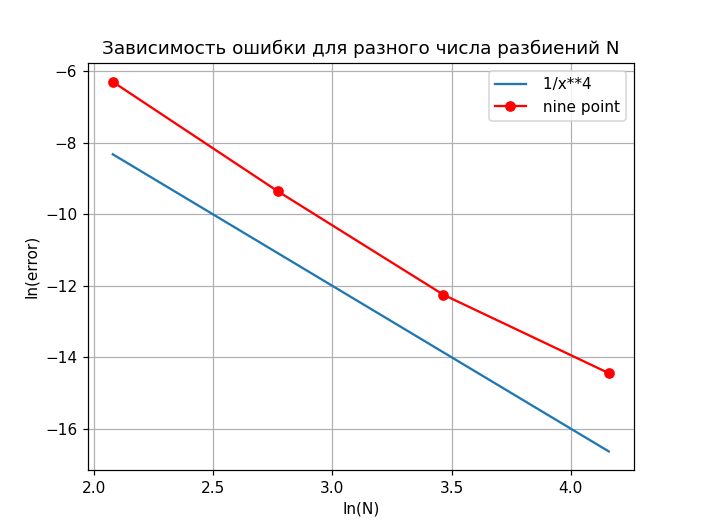

[]

In [345]:
number = np.array([8, 16, 32, 64])


plt.subplots(1)
plt.title('Зависимость ошибки для разного числа разбиений N')
plt.xlabel('ln(N)')
plt.ylabel('ln(error)')
plt.plot(np.log(number), np.log(1/number**2), label = ' 1/x**4')

plt.plot(np.log(number), np.log(dif_arr), '-ro', label = ' nine point')
plt.grid()
plt.legend()
plt.plot()

In [18]:

def Jacoby(Nd):
    dif = []
    err_arr = []
    num_arr = []
    k = -1
    e = exact(Nd)
    f = init(Nd)

    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
    u_1 = np.zeros((Nd,Nd))
    while k==-1 or min(err_arr)>1e-6 and k != 8000:
        
        k += 1 
        u_new = np.copy(u)
        
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u[i][j] = (u_new[i-1][j] + u_new[i+1][j] + u_new[i][j-1] + u_new[i][j+1] - h**2 * f[i][j]) / 4
                
        err_arr.append(np.max(abs(u_new - u)))
        num_arr.append(k+1)
    dif.append(np.max(abs(e - u)))
    print(k)
    return u, err_arr, dif, num_arr

a, b, c ,d = Jacoby(32)

1700


In [17]:
global dif_arr_G
dif_arr_G = []

def gauss(Nd) :  
    err_arr = []
    num_arr = []
    k = -1
    e = exact(Nd)
    f = init(Nd)

    h = abs(x_1[1] - x_1[2])
    u = np.zeros((Nd,Nd))
    u_1 = np.zeros((Nd,Nd))
    while k==-1 or min(err_arr)>1e-6 and k != 8000:
        
        k += 1 
        u = np.copy(u_1)
        
        u_new = np.copy(u_1)
        for i in range(1, Nd-1):
            for j in range(1, Nd-1):
                u_1[i][j] = -(f[i][j]*h**2 - u_1[i-1][j] - u[i+1][j] - u_1[i][j-1]- u[i][j+1])/4
        print(u - u_1)
                
        
        err_arr.append(np.max(abs(u_new - u_1)))
        num_arr.append(k+1)
    dif_arr_G.append(np.max(abs(e - u)))
    print(k)
    return u_1, err_arr, dif_arr_G, num_arr


a, b, c, d = gauss(32)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.82266005e-04  2.52519277e-04 ...  7.18895720e-04
   3.06379073e-04  0.00000000e+00]
 [ 0.00000000e+00  4.17826132e-04  5.63047569e-04 ...  1.05229470e-04
  -2.07616752e-04  0.00000000e+00]
 ...
 [ 0.00000000e+00  5.89326165e-04  8.46858304e-04 ... -1.12130978e-03
  -1.21282137e-03  0.00000000e+00]
 [ 0.00000000e+00  3.29597547e-04  5.01066738e-04 ...  3.75008537e-04
  -8.27980643e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.67586352e-04  2.60416743e-04 ...  2.24217782e-04
   4.15025755e-06  0.00000000e+00]
 [ 0.00000000e+00  3.53112086e-04  5.43720420e-04 ... -2.85194031e-04
  -3.55352402e-04  0.00000000e+00]
 ...
 [ 0.00000000e+00  4.63378932e-04  7.5953214

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.99920209e-05  3.67437807e-05 ... -3.17722134e-04
  -1.60477567e-04  0.00000000e+00]
 [ 0.00000000e+00  3.80357366e-05  6.96570912e-05 ... -6.31693072e-04
  -3.18971708e-04  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.90464097e-05  3.21267869e-05 ... -5.64201416e-04
  -2.84010362e-04  0.00000000e+00]
 [ 0.00000000e+00  9.24533926e-06  1.55180913e-05 ... -2.80215384e-04
  -1.41056436e-04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.86948793e-05  3.42023832e-05 ... -3.12769362e-04
  -1.57935268e-04  0.00000000e+00]
 [ 0.00000000e+00  3.54879934e-05  6.46682156e-05 ... -6.21655204e-04
  -3.13825949e-04  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.66324124e-05  2.7427607

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.92363405e-05 -3.93521863e-05 ... -1.34999404e-04
  -6.77370215e-05  0.00000000e+00]
 [ 0.00000000e+00 -3.86103642e-05 -7.89385334e-05 ... -2.66859103e-04
  -1.33892790e-04  0.00000000e+00]
 ...
 [ 0.00000000e+00 -4.32154628e-05 -8.75532493e-05 ... -2.26072693e-04
  -1.13331764e-04  0.00000000e+00]
 [ 0.00000000e+00 -2.17605005e-05 -4.40737832e-05 ... -1.12745332e-04
  -5.65192740e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.94906376e-05 -3.98301745e-05 ... -1.32972395e-04
  -6.67162962e-05  0.00000000e+00]
 [ 0.00000000e+00 -3.91012784e-05 -7.98600756e-05 ... -2.62848961e-04
  -1.31873682e-04  0.00000000e+00]
 ...
 [ 0.000

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.21716191e-05 -4.43656797e-05 ... -7.21364672e-05
  -3.61345154e-05  0.00000000e+00]
 [ 0.00000000e+00 -4.40684864e-05 -8.81712219e-05 ... -1.42614876e-04
  -7.14373111e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -4.22448832e-05 -8.43167976e-05 ... -1.21316477e-04
  -6.07433685e-05  0.00000000e+00]
 [ 0.00000000e+00 -2.11799849e-05 -4.22699177e-05 ... -6.05744598e-05
  -3.03294571e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.21085415e-05 -4.42295534e-05 ... -7.11793853e-05
  -3.56541741e-05  0.00000000e+00]
 [ 0.00000000e+00 -4.39391532e-05 -8.78930425e-05 ... -1.40724237e-04
  -7.04884697e-05  0.00000000e+00]
 ...
 [ 0.000

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.81783918e-05 -3.61673818e-05 ... -4.38949776e-05
  -2.19706972e-05  0.00000000e+00]
 [ 0.00000000e+00 -3.60511769e-05 -7.17233754e-05 ... -8.68185149e-05
  -4.34547905e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -3.29289041e-05 -6.54406199e-05 ... -7.44108075e-05
  -3.72355489e-05  0.00000000e+00]
 [ 0.00000000e+00 -1.64864944e-05 -3.27629834e-05 ... -3.71757463e-05
  -1.86028238e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.80546397e-05 -3.59178910e-05 ... -4.33643778e-05
  -2.17047921e-05  0.00000000e+00]
 [ 0.00000000e+00 -3.58045323e-05 -7.12262516e-05 ... -8.57699338e-05
  -4.29293133e-05  0.00000000e+00]
 ...
 [ 0.000

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.34241436e-05 -2.66416475e-05 ... -2.77584407e-05
  -1.38875784e-05  0.00000000e+00]
 [ 0.00000000e+00 -2.65980668e-05 -5.27855489e-05 ... -5.49210022e-05
  -2.74769067e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.37419147e-05 -4.70921244e-05 ... -4.73545470e-05
  -2.36881769e-05  0.00000000e+00]
 [ 0.00000000e+00 -1.18791598e-05 -2.35619362e-05 ... -2.36665478e-05
  -1.18386812e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.33099286e-05 -2.64138417e-05 ... -2.74443328e-05
  -1.37303099e-05  0.00000000e+00]
 [ 0.00000000e+00 -2.63713544e-05 -5.23333980e-05 ... -5.42999043e-05
  -2.71659368e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.35299531e-05 -4.6670143

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.36369953e-06 -1.85602369e-05 ... -1.77892534e-05
  -8.89759061e-06  0.00000000e+00]
 [ 0.00000000e+00 -1.85445480e-05 -3.67576367e-05 ... -3.52043321e-05
  -1.76079848e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.63560705e-05 -3.24109676e-05 ... -3.04759337e-05
  -1.52418397e-05  0.00000000e+00]
 [ 0.00000000e+00 -8.18097945e-06 -1.62111808e-05 ... -1.52341573e-05
  -7.61899924e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.27619623e-06 -1.83864011e-05 ... -1.75964318e-05
  -8.80110414e-06  0.00000000e+00]
 [ 0.00000000e+00 -1.83711092e-05 -3.64130906e-05 ... -3.48228884e-05
  -1.74171144e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.61997026e-05 -3.2100576

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.24892136e-06 -1.23782641e-05 ... -1.13283099e-05
  -5.66515707e-06  0.00000000e+00]
 [ 0.00000000e+00 -1.23729302e-05 -2.45089606e-05 ... -2.24213046e-05
  -1.12126198e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.08426479e-05 -2.14747362e-05 ... -1.94576355e-05
  -9.73012797e-06  0.00000000e+00]
 [ 0.00000000e+00 -5.42232379e-06 -1.07393027e-05 ... -9.72752892e-06
  -4.86441422e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.18779856e-06 -1.22570581e-05 ... -1.12087134e-05
  -5.60533330e-06  0.00000000e+00]
 [ 0.00000000e+00 -1.22518596e-05 -2.42688821e-05 ... -2.21846464e-05
  -1.10942406e-05  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.07354049e-05 -2.1262155

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.28306267e-06 -8.48158740e-06 ... -7.59046257e-06
  -3.79560746e-06  0.00000000e+00]
 [ 0.00000000e+00 -8.47958163e-06 -1.67917461e-05 ... -1.50242574e-05
  -7.51286725e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -7.40802405e-06 -1.46686819e-05 ... -1.30547387e-05
  -6.52786126e-06  0.00000000e+00]
 [ 0.00000000e+00 -3.70438789e-06 -7.33506818e-06 ... -6.52688544e-06
  -3.26368667e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.24029226e-06 -8.39684238e-06 ... -7.51140084e-06
  -3.75606702e-06  0.00000000e+00]
 [ 0.00000000e+00 -8.39488759e-06 -1.66239352e-05 ... -1.48677851e-05
  -7.43461230e-06  0.00000000e+00]
 ...
 [ 0.000

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.97810481e-06 -5.89648910e-06 ... -5.21445549e-06
  -2.60737649e-06  0.00000000e+00]
 [ 0.00000000e+00 -5.89569549e-06 -1.16731440e-05 ... -1.03216595e-05
  -5.16112178e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -5.14229881e-06 -1.01810253e-05 ... -8.97477408e-06
  -4.48758157e-06  0.00000000e+00]
 [ 0.00000000e+00 -2.57129810e-06 -5.09080035e-06 ... -4.48719569e-06
  -2.24369431e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.94804615e-06 -5.83695552e-06 ... -5.16054194e-06
  -2.58041593e-06  0.00000000e+00]
 [ 0.00000000e+00 -5.83618210e-06 -1.15552735e-05 ... -1.02149490e-05
  -5.10775910e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -5.09022070e-06 -1.0077892

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.88326694e-06 -3.72837286e-06 ... -3.27081461e-06
  -1.63545395e-06  0.00000000e+00]
 [ 0.00000000e+00 -3.72812390e-06 -7.38069798e-06 ... -6.47451491e-06
  -3.23734904e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -3.24818247e-06 -6.43040465e-06 ... -5.63229311e-06
  -2.81620756e-06  0.00000000e+00]
 [ 0.00000000e+00 -1.62413788e-06 -3.21529258e-06 ... -2.81608654e-06
  -1.40807353e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.86412419e-06 -3.69046930e-06 ... -3.23716720e-06
  -1.61862906e-06  0.00000000e+00]
 [ 0.00000000e+00 -3.69022667e-06 -7.30565983e-06 ... -6.40791293e-06
  -3.20404572e-06  0.00000000e+00]
 ...
 [ 0.000

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.22523488e-06 -2.42552117e-06 ... -2.11977925e-06
  -1.05990543e-06  0.00000000e+00]
 [ 0.00000000e+00 -2.42543680e-06 -4.80148408e-06 ... -4.19611208e-06
  -2.09808707e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.11211015e-06 -4.18116493e-06 ... -3.65109227e-06
  -1.82556681e-06  0.00000000e+00]
 [ 0.00000000e+00 -1.05607088e-06 -2.09061305e-06 ... -1.82552580e-06
  -9.12773152e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.21273949e-06 -2.40078281e-06 ... -2.09802545e-06
  -1.04902813e-06  0.00000000e+00]
 [ 0.00000000e+00 -2.40070059e-06 -4.75251142e-06 ... -4.15305116e-06
  -2.07655582e-06  0.00000000e+00]
 ...
 [ 0.000

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.96282441e-07 -1.57630968e-06 ... -1.37488209e-06
  -6.87446399e-07  0.00000000e+00]
 [ 0.00000000e+00 -1.57628109e-06 -3.12038349e-06 ... -2.72160180e-06
  -1.36081142e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.37228334e-06 -2.71653683e-06 ... -2.36838085e-06
  -1.18419743e-06  0.00000000e+00]
 [ 0.00000000e+00 -6.86147027e-07 -1.35827878e-06 ... -1.18418353e-06
  -5.92095241e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.88147692e-07 -1.56020556e-06 ... -1.36079054e-06
  -6.80400489e-07  0.00000000e+00]
 [ 0.00000000e+00 -1.56017770e-06 -3.08850412e-06 ... -2.69370764e-06
  -1.34686407e-06  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.35825790e-06 -2.6887715

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.44492848e-07 -1.07785714e-06 ... -9.39236355e-07
  -4.69620242e-07  0.00000000e+00]
 [ 0.00000000e+00 -1.07784612e-06 -2.13366255e-06 ... -1.85923938e-06
  -9.29623741e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -9.38234668e-07 -1.85728708e-06 ... -1.61803052e-06
  -8.09017959e-07  0.00000000e+00]
 [ 0.00000000e+00 -4.69119399e-07 -9.28647534e-07 ... -8.09012603e-07
  -4.04507641e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.38925817e-07 -1.06683660e-06 ... -9.29615693e-07
  -4.64809859e-07  0.00000000e+00]
 [ 0.00000000e+00 -1.06682586e-06 -2.11184674e-06 ... -1.84019517e-06
  -9.20101534e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -9.28639486e-07 -1.8382925

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.60925422e-07 -7.14468833e-07 ... -6.22231576e-07
  -3.11116525e-07  0.00000000e+00]
 [ 0.00000000e+00 -7.14464901e-07 -1.41431675e-06 ... -1.23172350e-06
  -6.15863195e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -6.21874196e-07 -1.23102696e-06 ... -1.07196163e-06
  -5.35981777e-07  0.00000000e+00]
 [ 0.00000000e+00 -3.10937834e-07 -6.15514905e-07 ... -5.35979866e-07
  -2.67990411e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.57233434e-07 -7.07160275e-07 ... -6.15860324e-07
  -3.07930880e-07  0.00000000e+00]
 [ 0.00000000e+00 -7.07156444e-07 -1.39984913e-06 ... -1.21911148e-06
  -6.09557148e-07  0.00000000e+00]
 ...
 [ 0.000

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.41681650e-07 -4.78418316e-07 ... -4.16530766e-07
  -2.08265652e-07  0.00000000e+00]
 [ 0.00000000e+00 -4.78416877e-07 -9.47044956e-07 ... -8.24534193e-07
  -4.12267626e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -4.16399932e-07 -8.24279197e-07 ... -7.17599969e-07
  -3.58800337e-07  0.00000000e+00]
 [ 0.00000000e+00 -2.08200236e-07 -4.12140120e-07 ... -3.58799638e-07
  -1.79399994e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.39208798e-07 -4.73523174e-07 ... -4.12266575e-07
  -2.06133550e-07  0.00000000e+00]
 [ 0.00000000e+00 -4.73521771e-07 -9.37354836e-07 ... -8.16093123e-07
  -4.08047077e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -4.12139069e-07 -8.1584461

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.55298454e-07 -3.07418683e-07 ... -2.67604628e-07
  -1.33802403e-07  0.00000000e+00]
 [ 0.00000000e+00 -3.07418207e-07 -6.08545007e-07 ... -5.29731067e-07
  -2.64865708e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.67561422e-07 -5.29646857e-07 ... -4.61034811e-07
  -2.30517522e-07  0.00000000e+00]
 [ 0.00000000e+00 -1.33780800e-07 -2.64823601e-07 ... -2.30517291e-07
  -1.15258703e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.53709223e-07 -3.04272733e-07 ... -2.64865361e-07
  -1.32432767e-07  0.00000000e+00]
 [ 0.00000000e+00 -3.04272270e-07 -6.02317493e-07 ... -5.24308614e-07
  -2.62154477e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.64823254e-07 -5.2422654

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.01860140e-07 -2.01635455e-07 ... -1.75506230e-07
  -8.77531459e-08  0.00000000e+00]
 [ 0.00000000e+00 -2.01635290e-07 -3.99143601e-07 ... -3.47419730e-07
  -1.73709926e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.75491207e-07 -3.47390450e-07 ... -3.02367429e-07
  -1.51183755e-07  0.00000000e+00]
 [ 0.00000000e+00 -8.77456344e-08 -1.73695285e-07 ... -1.51183675e-07
  -7.55918574e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00817686e-07 -1.99571880e-07 ... -1.73709805e-07
  -8.68549327e-08  0.00000000e+00]
 [ 0.00000000e+00 -1.99571719e-07 -3.95058689e-07 ... -3.43863656e-07
  -1.71931887e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.73695164e-07 -3.4383512

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.41150854e-08 -1.26917812e-07 ... -1.10465550e-07
  -5.52327848e-08  0.00000000e+00]
 [ 0.00000000e+00 -1.26917760e-07 -2.51237666e-07 ... -2.18669831e-07
  -1.09334934e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.10460838e-07 -2.18660647e-07 ... -1.90313972e-07
  -9.51569986e-08  0.00000000e+00]
 [ 0.00000000e+00 -5.52304288e-08 -1.09330342e-07 ... -9.51569734e-08
  -4.75784930e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.34588932e-08 -1.25618858e-07 ... -1.09334897e-07
  -5.46674578e-08  0.00000000e+00]
 [ 0.00000000e+00 -1.25618808e-07 -2.48666346e-07 ... -2.16431669e-07
  -1.08215853e-07  0.00000000e+00]
 ...
 [ 0.000

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.87292114e-08 -7.66656565e-08 ... -6.67258117e-08
  -3.33629086e-08  0.00000000e+00]
 [ 0.00000000e+00 -7.66656418e-08 -1.51761979e-07 ... -1.32085733e-07
  -6.60428718e-08  0.00000000e+00]
 ...
 [ 0.00000000e+00 -6.67244785e-08 -1.32083134e-07 ... -1.14957785e-07
  -5.74788961e-08  0.00000000e+00]
 [ 0.00000000e+00 -3.33622420e-08 -6.60415725e-08 ... -5.74788890e-08
  -2.87394463e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.83328246e-08 -7.58809964e-08 ... -6.60428610e-08
  -3.30214332e-08  0.00000000e+00]
 [ 0.00000000e+00 -7.58809821e-08 -1.50208720e-07 ... -1.30733812e-07
  -6.53669111e-08  0.00000000e+00]
 ...
 [ 0.000

   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.46293524e-08 -4.87545478e-08 ... -4.24329507e-08
  -2.12164762e-08  0.00000000e+00]
 [ 0.00000000e+00 -4.87545431e-08 -9.65110924e-08 ... -8.39972934e-08
  -4.19986484e-08  0.00000000e+00]
 ...
 [ 0.00000000e+00 -4.24325216e-08 -8.39964571e-08 ... -7.31051652e-08
  -3.65525838e-08  0.00000000e+00]
 [ 0.00000000e+00 -2.12162617e-08 -4.19982302e-08 ... -3.65525815e-08
  -1.82762913e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.43772727e-08 -4.82555485e-08 ... -4.19986450e-08
  -2.09993233e-08  0.00000000e+00]
 [ 0.00000000e+00 -4.82555439e-08 -9.55233081e-08 ... -8.31375722e-08
  -4.15687878e-08  0.00000000e+00]
 ...
 [ 0.000

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.47251095e-08 -2.91487971e-08 ... -2.53691565e-08
  -1.26845785e-08  0.00000000e+00]
 [ 0.00000000e+00 -2.91487958e-08 -5.77009180e-08 ... -5.02190040e-08
  -2.51095025e-08  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.53690382e-08 -5.02187735e-08 ... -4.37070031e-08
  -2.18535018e-08  0.00000000e+00]
 [ 0.00000000e+00 -1.26845193e-08 -2.51093872e-08 ... -2.18535012e-08
  -1.09267508e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.45743982e-08 -2.88504597e-08 ... -2.51095016e-08
  -1.25547510e-08  0.00000000e+00]
 [ 0.00000000e+00 -2.88504584e-08 -5.71103501e-08 ... -4.97050093e-08
  -2.48525051e-08  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.51093863e-08 -4.9704784